# Exploratory Data Analysis


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1) mean for alll level
hetergenous time trend for one specificl level - 8 plots

In [2]:
ECLSK2011 = pd.read_csv('ECLSK2011.csv')
ECLSK2011['CHILDID'] = ECLSK2011['CHILDID'].astype('category')
ECLSK2011['MATH'] = ECLSK2011['MATH'].dropna()
ECLSK2011['READING'] = ECLSK2011['READING'].dropna()

In [3]:

custom_palette = sns.color_palette('mako', 10)
custom_palette.reverse()

In [4]:
#0: None
#1: 8TH GRADE OR BELOW
#2: 9TH - 12TH GRADE
#3: HIGH SCHOOL DIPLOMA/EQUIVALENT
#4: VOC/TECH PROGRAM
#5: SOME COLLEGE
#6: BACHELOR'S DEGREE
#7: GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE
#8: MASTER'S DEGREE
#9: DOCTORATE OR PROFESSIONAL DEGREE
#-9: NOT ASCERTAINED

legend_mapping = {
    0: 'None',
    1: '8TH GRADE OR BELOW',
    2: '9TH - 12TH GRADE',
    3: 'HIGH SCHOOL DIPLOMA/EQUIVALENT',
    4: 'VOC/TECH PROGRAM',
    5: 'SOME COLLEGE',
    6: "BACHELOR'S DEGREE",
    7: 'GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE',
    8: "MASTER'S DEGREE",
    9: 'DOCTORATE OR PROFESSIONAL DEGREE',
    -9: 'NOT ASCERTAINED'
}


In [5]:
# The first recording of the edcucation levels was recorded as X12, so it was encoded in the csv as the value for the first two time values
# This measurment recorded the education level at a max of 8, so values of 9 were also included in this category

In [6]:
sns.set(font_scale=0.5)

## Math

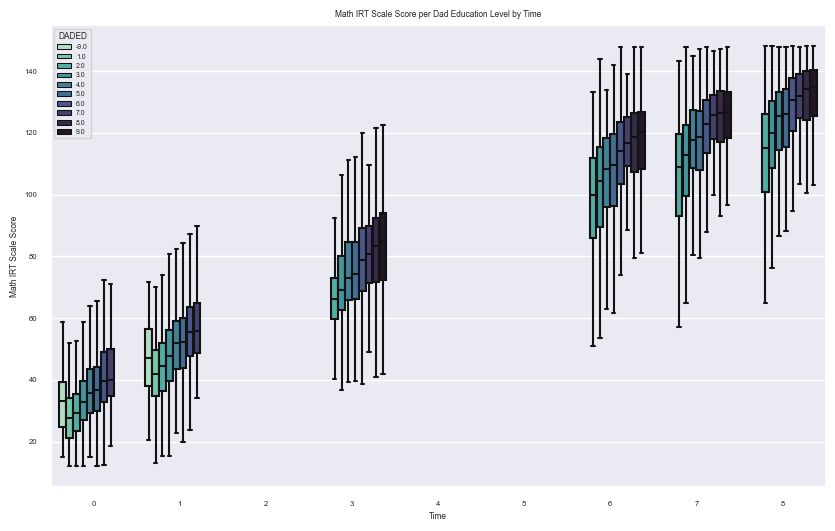

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME', y='MATH', hue='DADED', data=ECLSK2011, palette=custom_palette, showfliers=False)
plt.title('Math IRT Scale Score per Dad Education Level by Time')
plt.xlabel('Time')
plt.ylabel('Math IRT Scale Score')
plt.legend(title='DADED')

legend = plt.legend(title='DADED', fontsize='small')
plt.show()

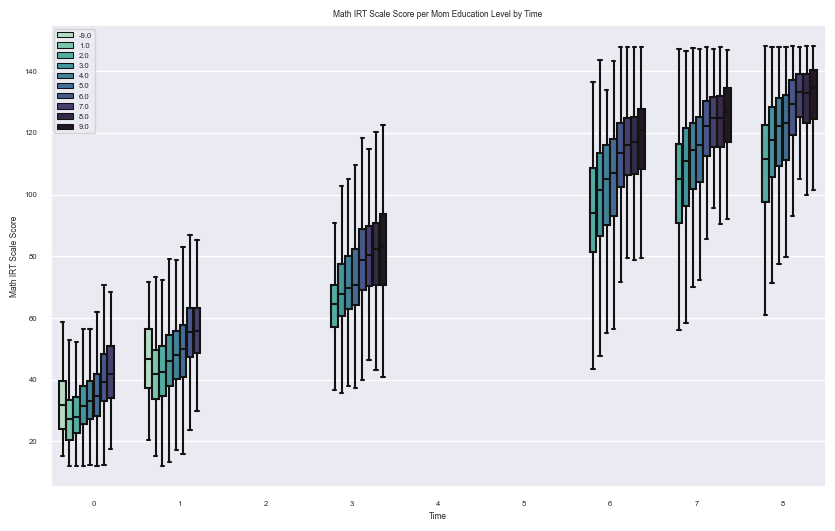

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME', y='MATH', hue='MOMED', data=ECLSK2011, palette=custom_palette, showfliers=False)
plt.title('Math IRT Scale Score per Mom Education Level by Time')
plt.xlabel('Time')
plt.ylabel('Math IRT Scale Score')

plt.legend()
plt.show()

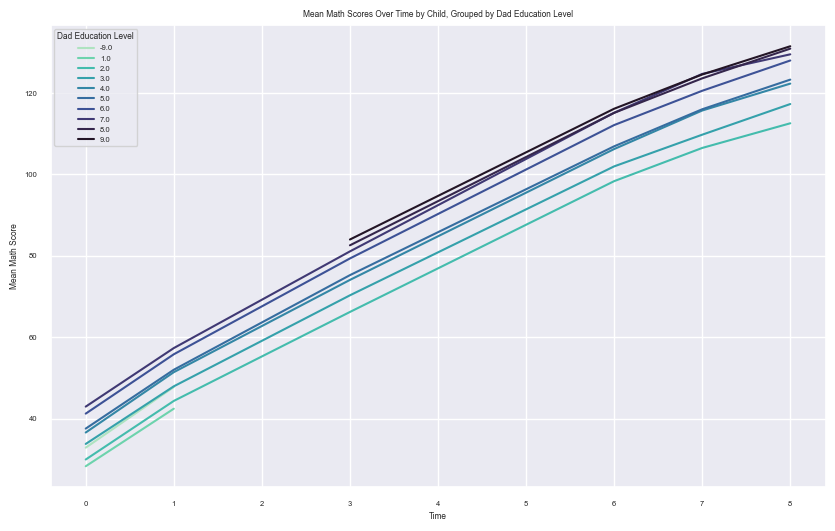

In [9]:
plt.figure(figsize=(10, 6))

sns.set_palette(custom_palette)
sns.lineplot(x='TIME', y='MATH', data=ECLSK2011, hue='DADED', estimator='mean', errorbar=None, palette=custom_palette)
plt.title('Mean Math Scores Over Time by Child, Grouped by Dad Education Level')
plt.xlabel('Time')
plt.ylabel('Mean Math Score')
plt.legend(title='Dad Education Level', loc='best')
plt.show()

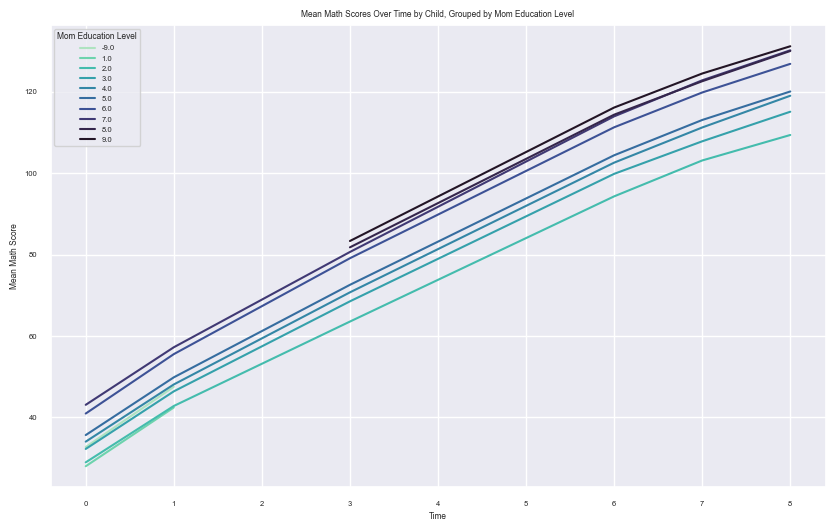

In [10]:
plt.figure(figsize=(10, 6))

sns.set_palette(custom_palette)
sns.lineplot(x='TIME', y='MATH', data=ECLSK2011, hue='MOMED', estimator='mean', errorbar=None, palette=custom_palette)
plt.title('Mean Math Scores Over Time by Child, Grouped by Mom Education Level')
plt.xlabel('Time')
plt.ylabel('Mean Math Score')
plt.legend(title='Mom Education Level', loc='best')
plt.show()

<Figure size 1000x600 with 0 Axes>

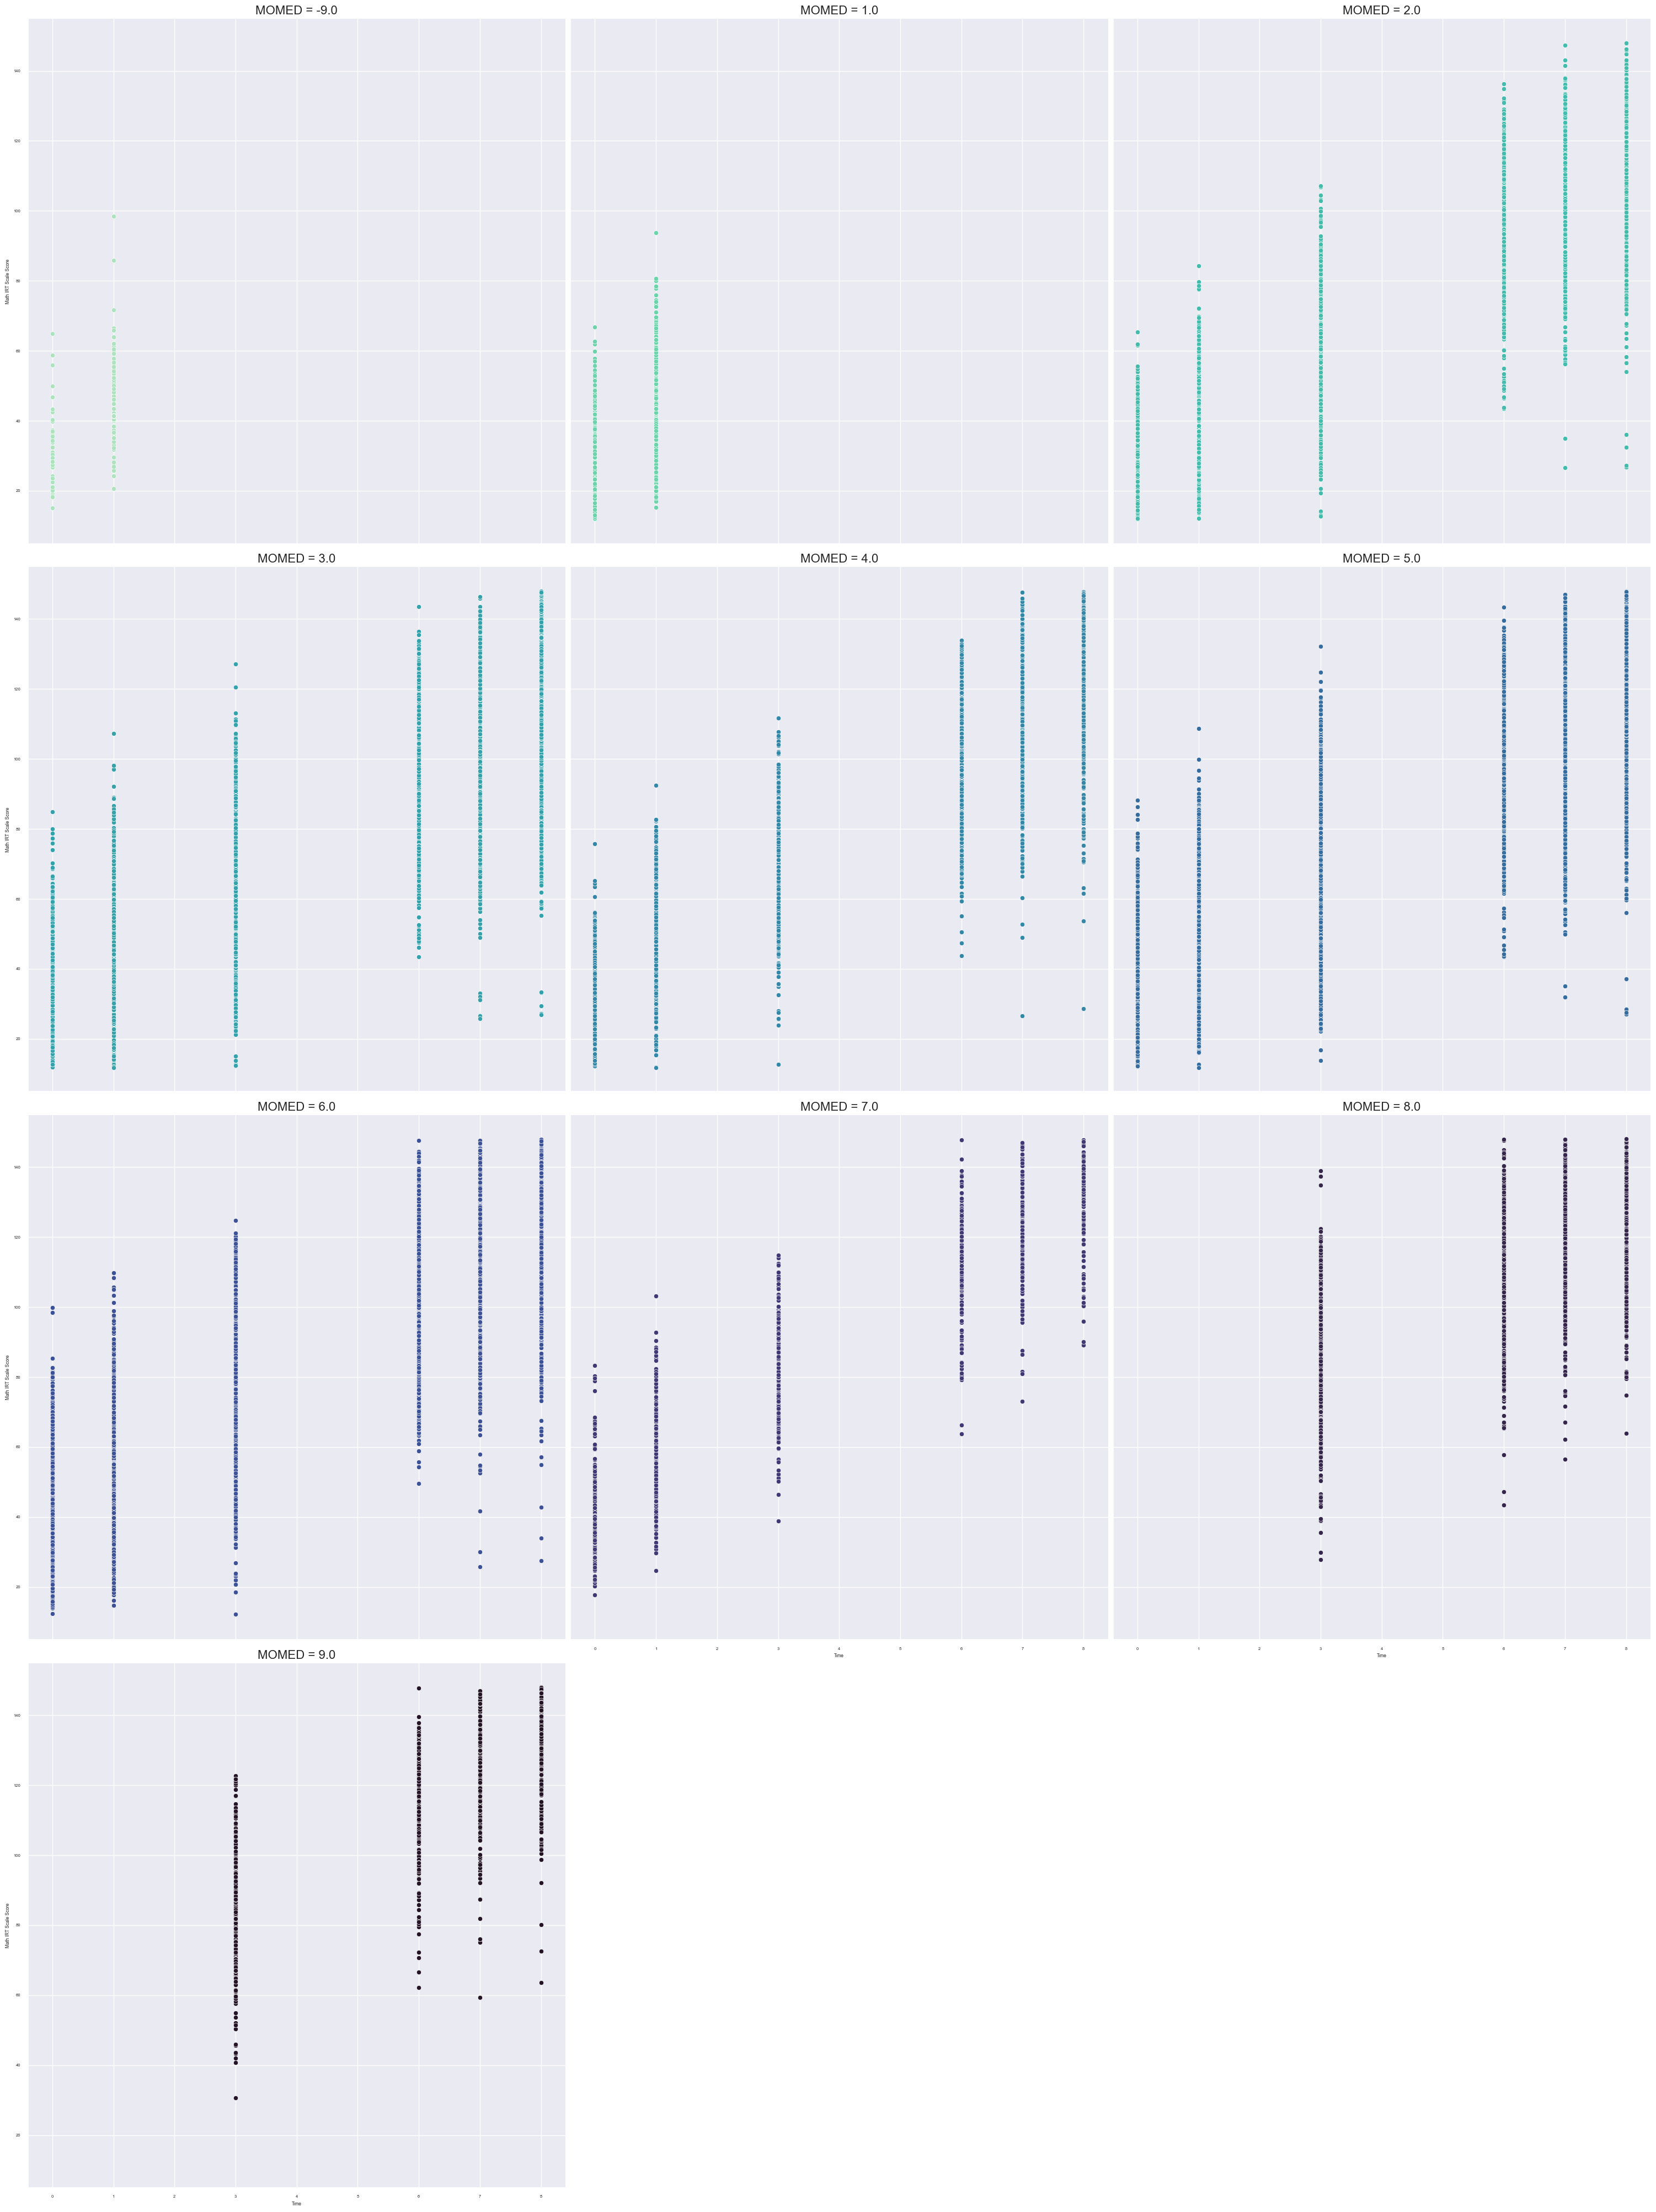

In [11]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(ECLSK2011, col_wrap=3,col="MOMED", hue="MOMED", palette=custom_palette, height=10)

g.map(sns.scatterplot, "TIME", "MATH")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=16)
g.set_xlabels("Time")
g.set_ylabels("Math IRT Scale Score")

plt.show()

<Figure size 1000x600 with 0 Axes>

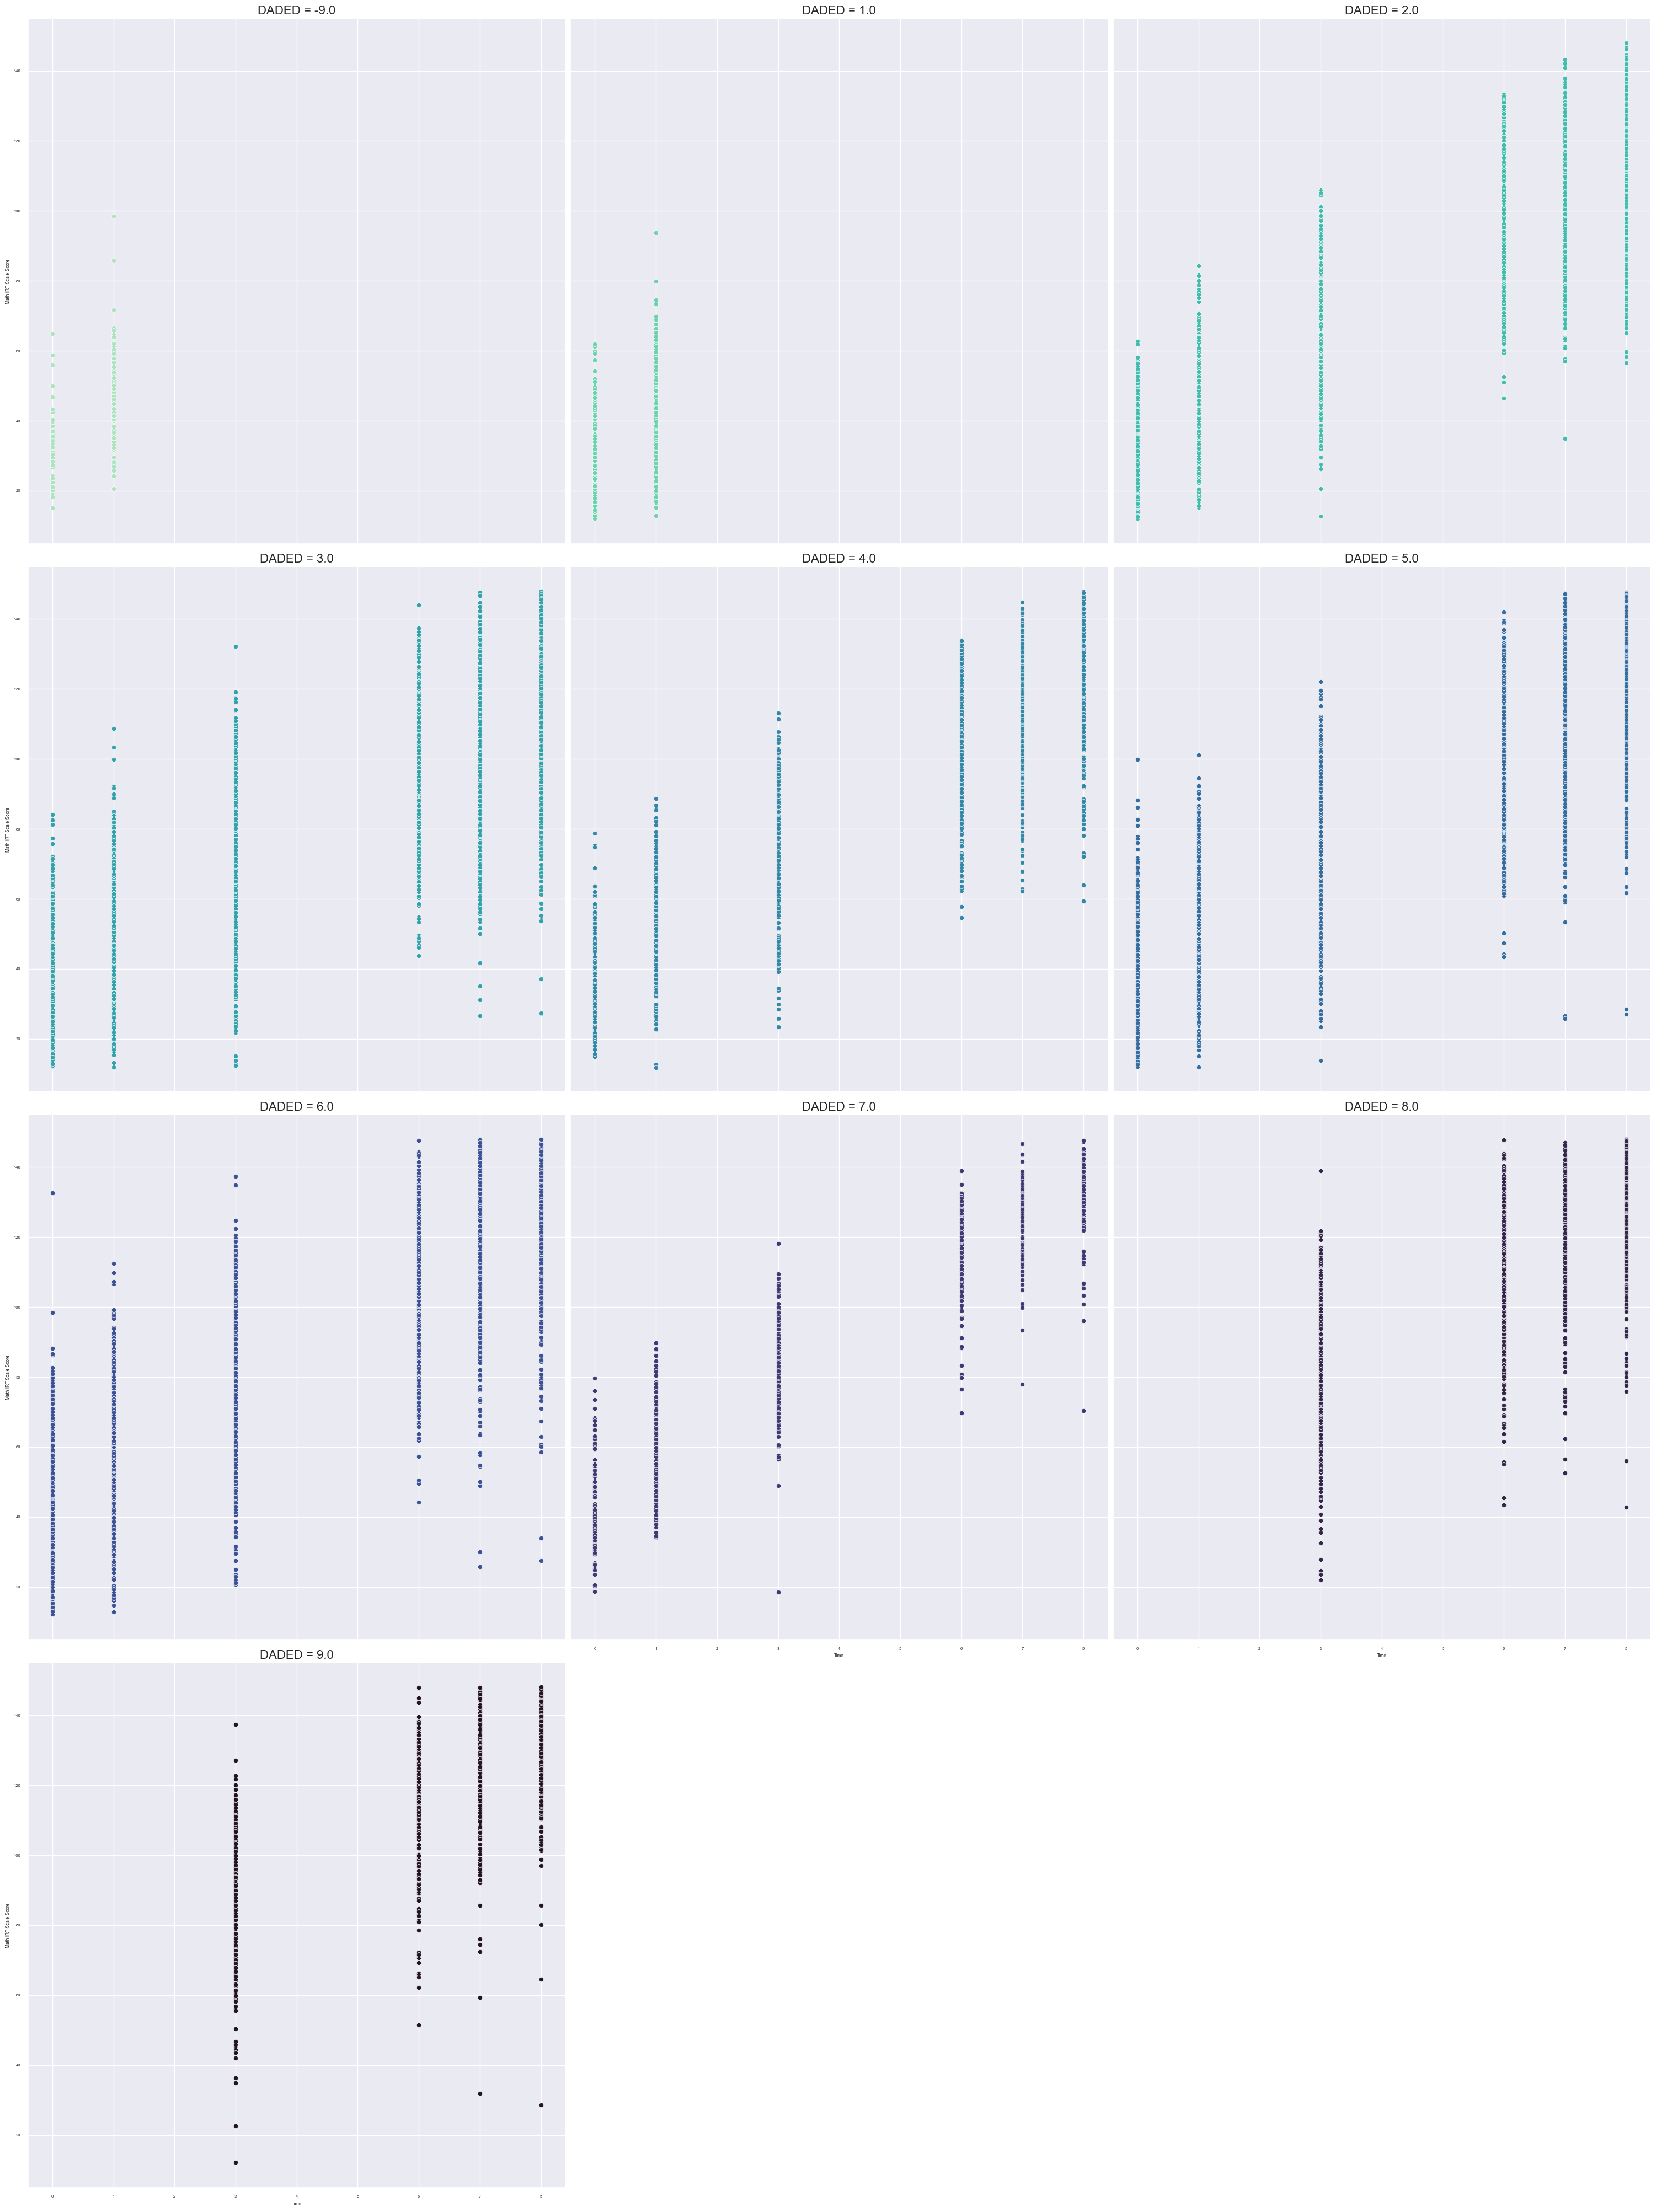

In [12]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(ECLSK2011, col_wrap=3,col="DADED", hue="DADED", palette=custom_palette, height=10)

g.map(sns.scatterplot, "TIME", "MATH")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=16)
g.set_xlabels("Time")
g.set_ylabels("Math IRT Scale Score")

plt.show()

<Figure size 1500x1000 with 0 Axes>

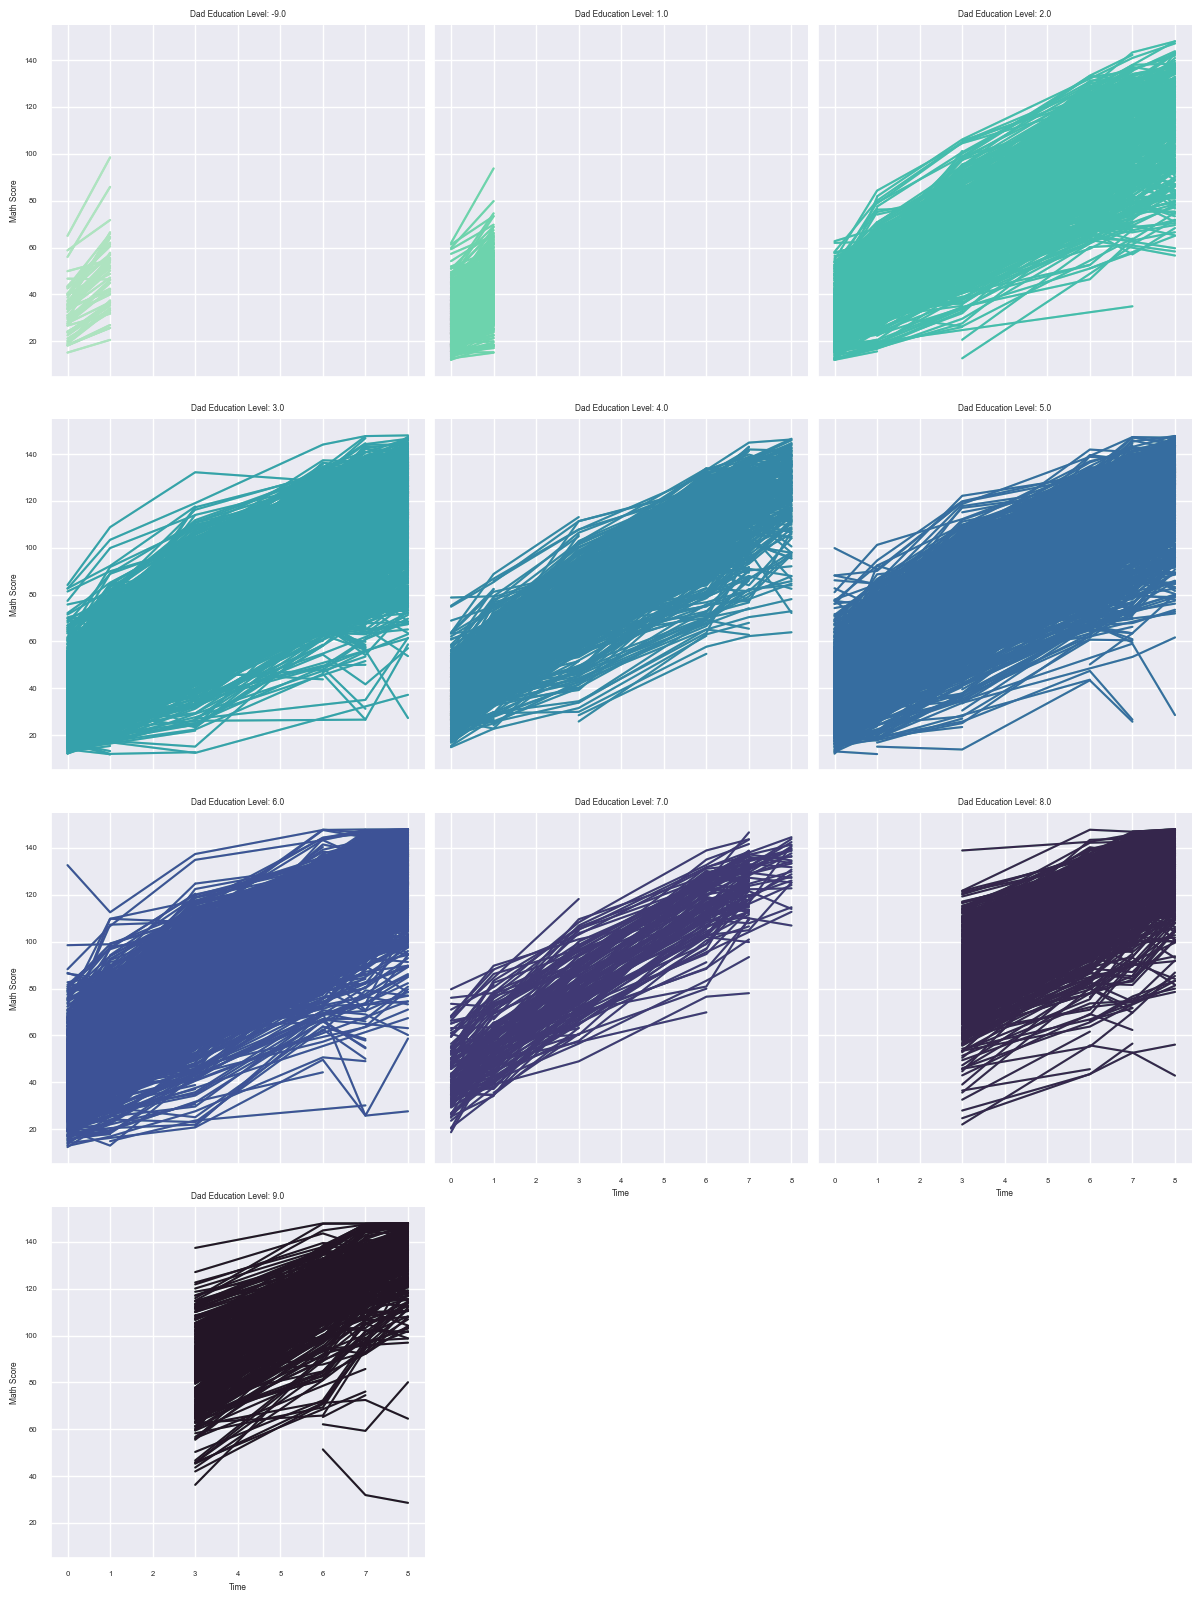

In [13]:
daded_order = sorted(ECLSK2011['DADED'].dropna().unique())

plt.figure(figsize=(15, 10))


grid = sns.FacetGrid(data=ECLSK2011, col='DADED', col_wrap=3, height=4, col_order=daded_order, palette=custom_palette)

def plot_lines(x, y,units, data=None, **kwargs):
    sns.lineplot(x=x, y=y, units = units, data=data, estimator = None, palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'MATH', 'CHILDID')


for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['DADED'] == title]
    plot_lines('TIME', 'MATH', 'CHILDID', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Dad Education Level: {title}')

grid.set_axis_labels('Time', 'Math Score')

plt.tight_layout()

plt.show()

<Figure size 1500x1000 with 0 Axes>

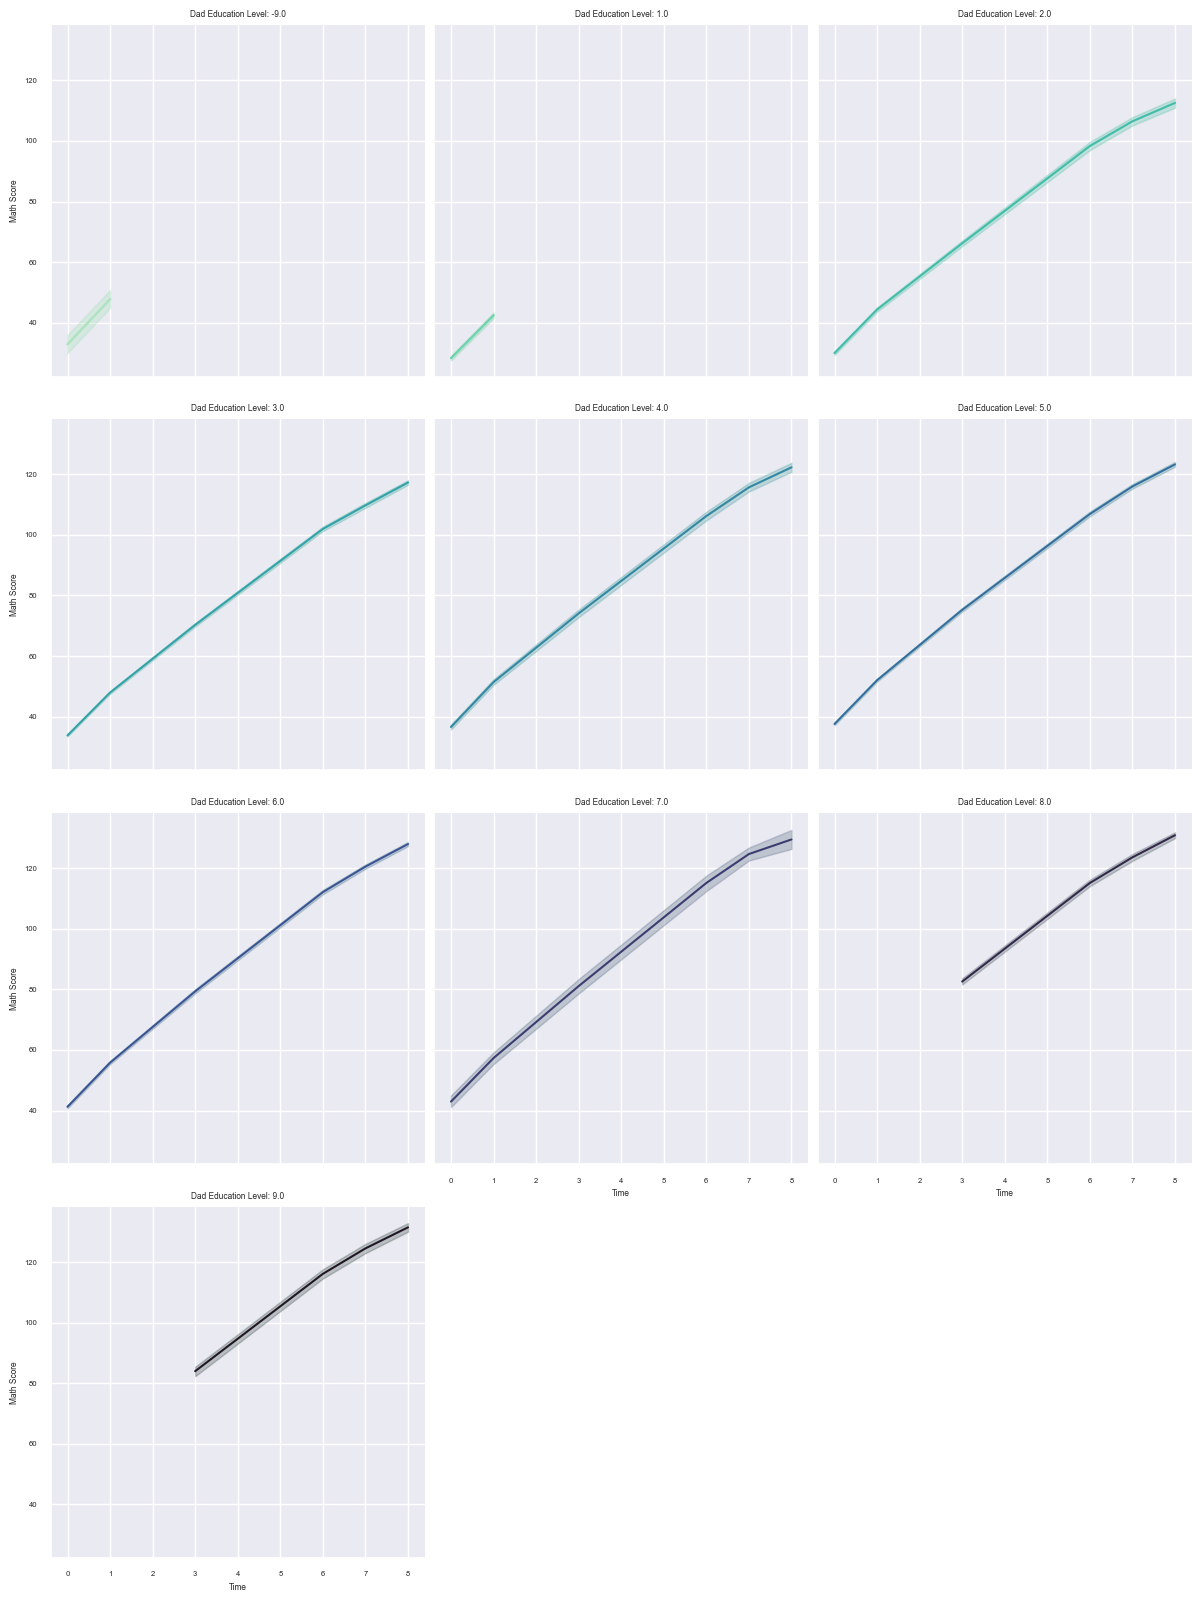

In [17]:
plt.figure(figsize=(15, 10))

grid = sns.FacetGrid(data=ECLSK2011, col='DADED', col_wrap=3, height=4, col_order=daded_order, palette=custom_palette)

def plot_lines(x, y, data=None, **kwargs):
    sns.lineplot(x=x, y=y, data=data, estimator='mean', palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'MATH')

for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['DADED'] == title]
    plot_lines('TIME', 'MATH', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Dad Education Level: {title}')

grid.set_axis_labels('Time', 'Math Score')

plt.tight_layout()

plt.show()

<Figure size 1500x1000 with 0 Axes>

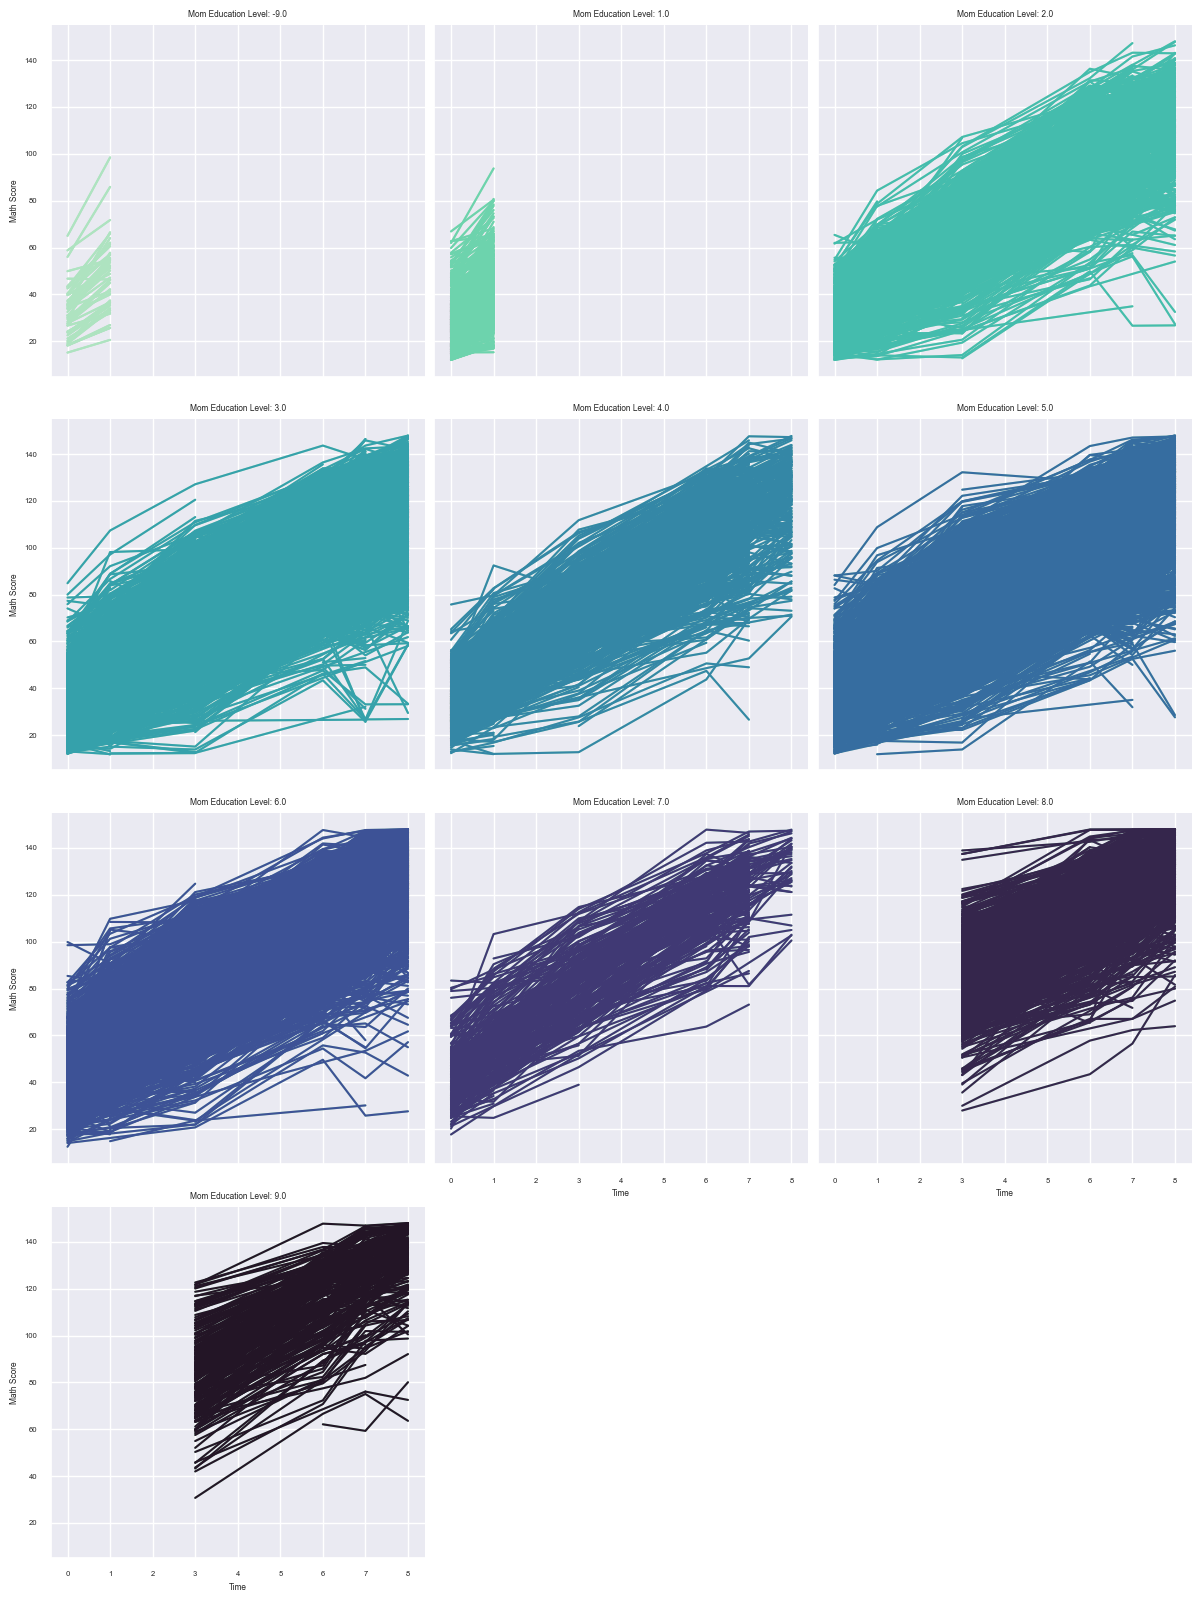

In [18]:
momed_order = sorted(ECLSK2011['MOMED'].dropna().unique())

plt.figure(figsize=(15, 10))


grid = sns.FacetGrid(data=ECLSK2011, col='MOMED', col_wrap=3, height=4, col_order=momed_order, palette=custom_palette)

def plot_lines(x, y,units, data=None, **kwargs):
    sns.lineplot(x=x, y=y, units = units, data=data, estimator = None, palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'MATH', 'CHILDID')


for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['MOMED'] == title]
    plot_lines('TIME', 'MATH', 'CHILDID', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Mom Education Level: {title}')

grid.set_axis_labels('Time', 'Math Score')

plt.tight_layout()

plt.show()

<Figure size 1500x1000 with 0 Axes>

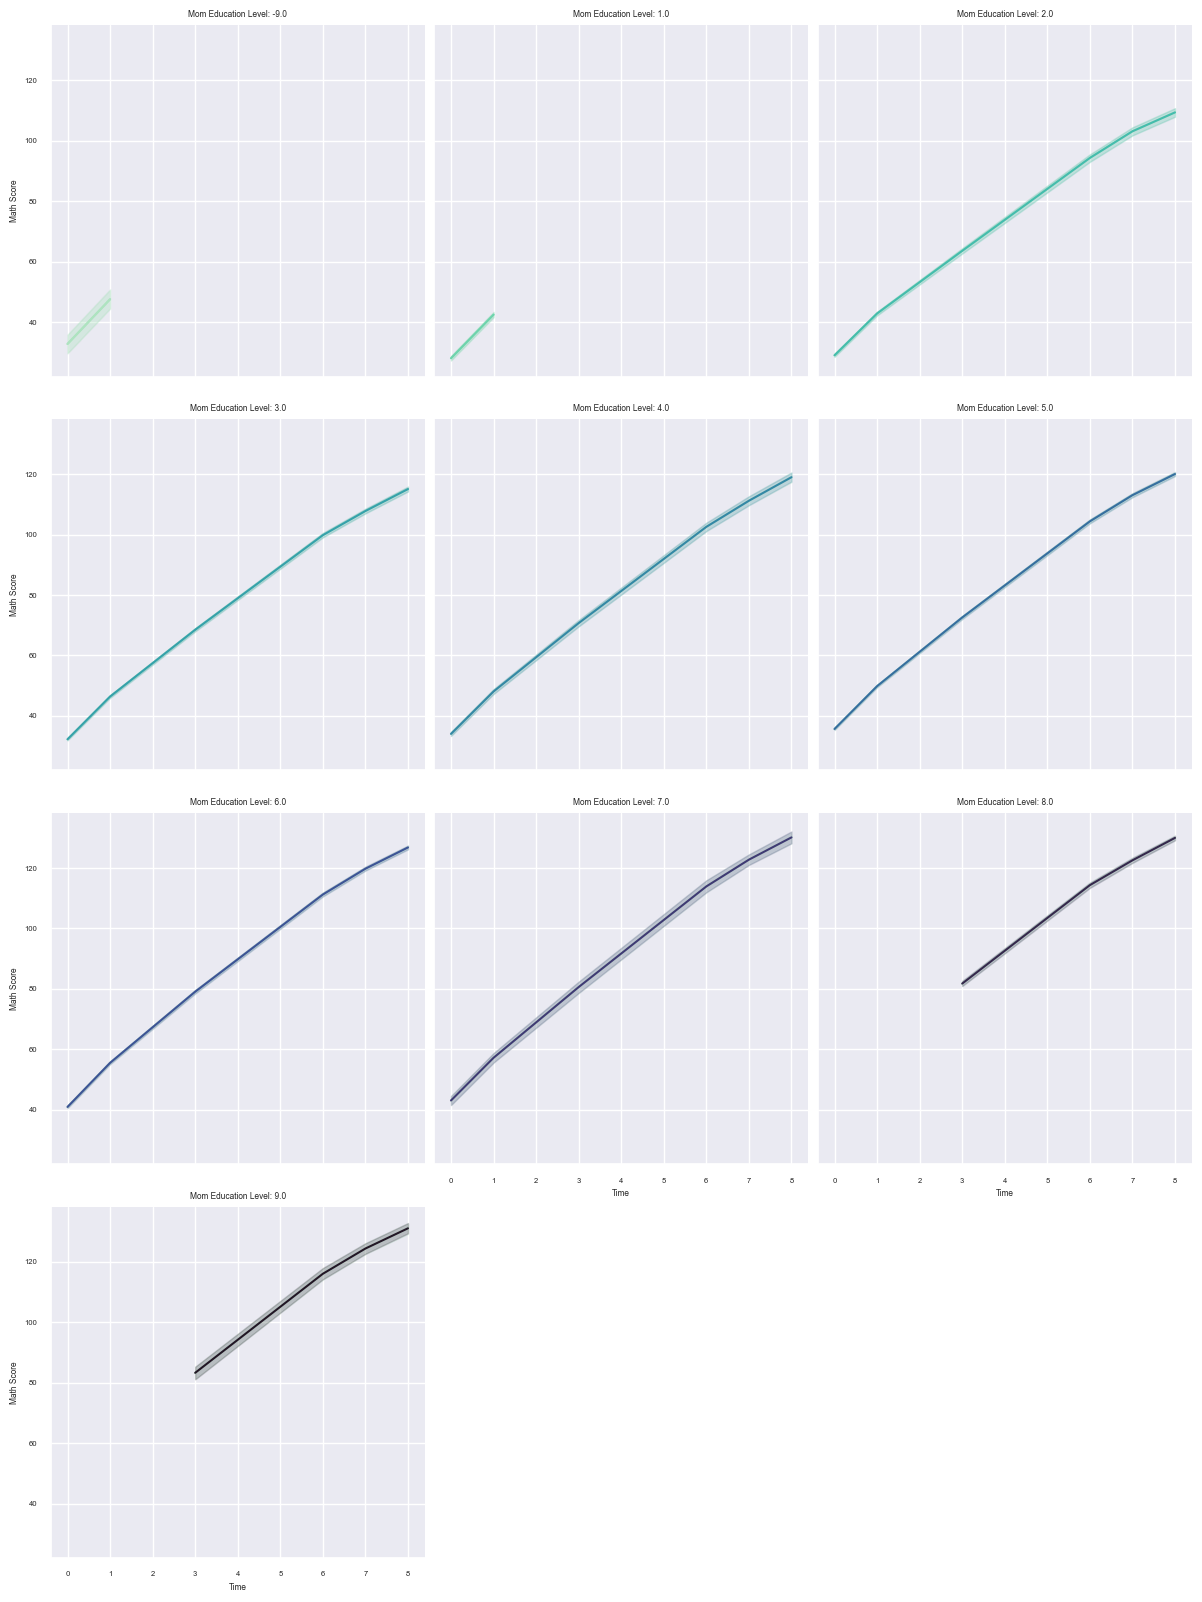

In [19]:
plt.figure(figsize=(15, 10))

grid = sns.FacetGrid(data=ECLSK2011, col='MOMED', col_wrap=3, height=4, col_order=daded_order, palette=custom_palette)

def plot_lines(x, y, data=None, **kwargs):
    sns.lineplot(x=x, y=y, data=data, estimator='mean', palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'MATH')

for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['MOMED'] == title]
    plot_lines('TIME', 'MATH', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Mom Education Level: {title}')

grid.set_axis_labels('Time', 'Math Score')

plt.tight_layout()

plt.show()

## Reading

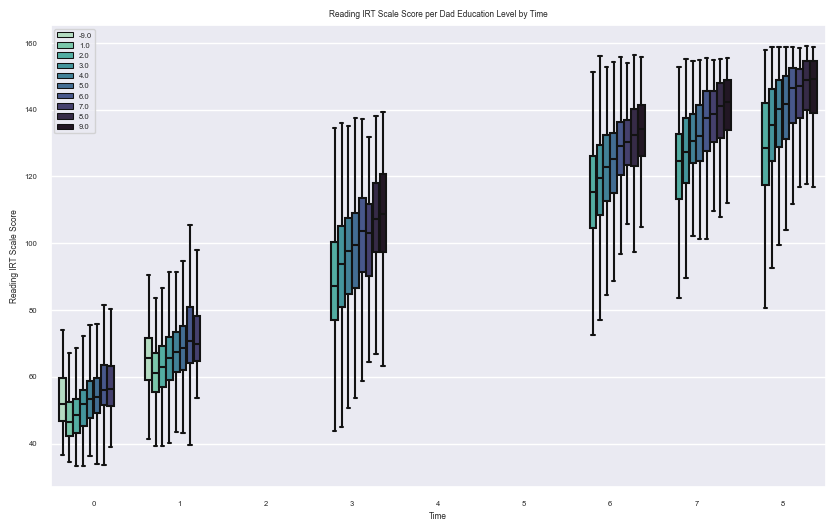

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME', y='READING', hue='DADED', data=ECLSK2011, palette=custom_palette, showfliers=False)
plt.title('Reading IRT Scale Score per Dad Education Level by Time')
plt.xlabel('Time')
plt.ylabel('Reading IRT Scale Score')

plt.legend()
plt.show()

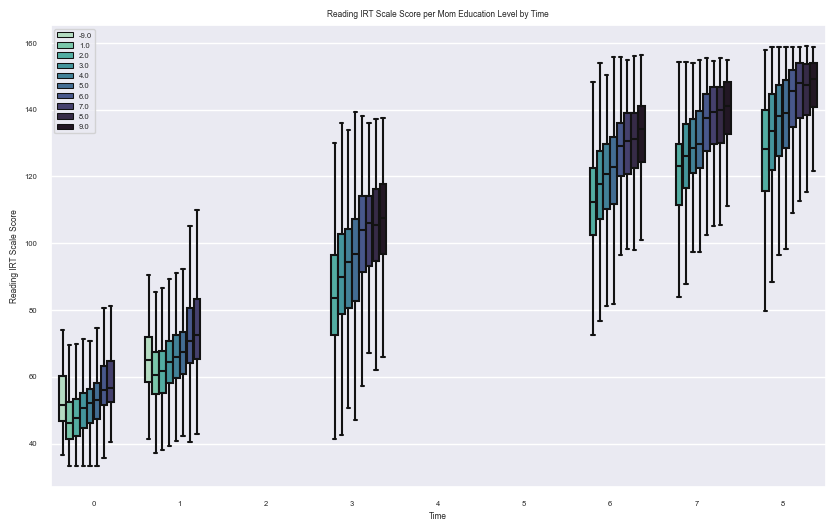

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME', y='READING', hue='MOMED', data=ECLSK2011, palette=custom_palette, showfliers=False)
plt.title('Reading IRT Scale Score per Mom Education Level by Time')
plt.xlabel('Time')
plt.ylabel('Reading IRT Scale Score')

plt.legend()
plt.show()

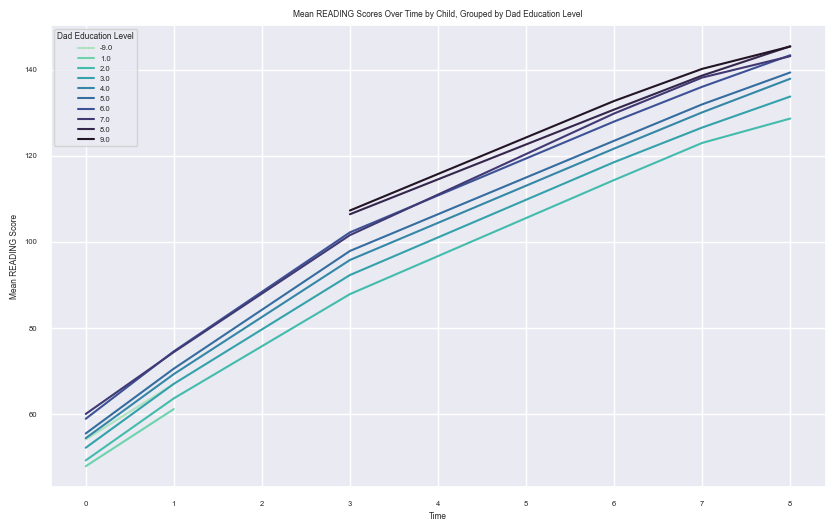

In [22]:
plt.figure(figsize=(10, 6))

sns.set_palette(custom_palette)
sns.lineplot(x='TIME', y='READING', data=ECLSK2011, hue='DADED', estimator='mean', errorbar=None, palette=custom_palette)
plt.title('Mean READING Scores Over Time by Child, Grouped by Dad Education Level')
plt.xlabel('Time')
plt.ylabel('Mean READING Score')
plt.legend(title='Dad Education Level', loc='best')
plt.show()

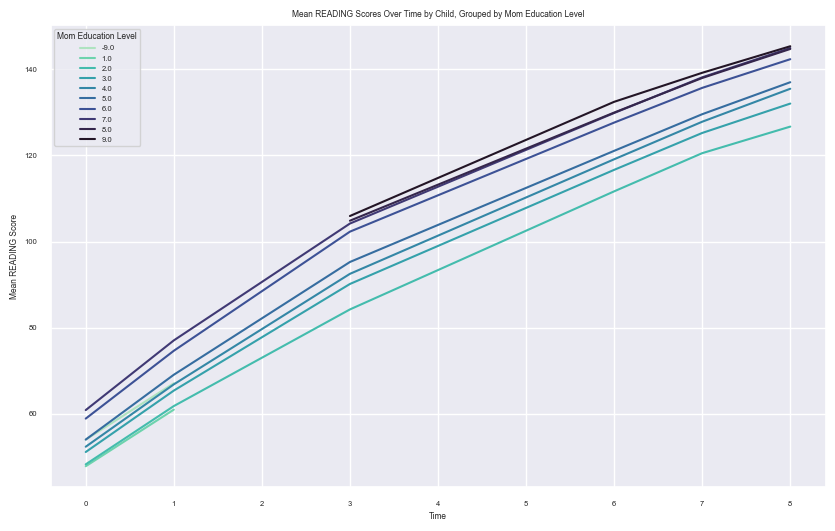

In [23]:
plt.figure(figsize=(10, 6))

sns.set_palette(custom_palette)
sns.lineplot(x='TIME', y='READING', data=ECLSK2011, hue='MOMED', estimator='mean', errorbar=None, palette=custom_palette)
plt.title('Mean READING Scores Over Time by Child, Grouped by Mom Education Level')
plt.xlabel('Time')
plt.ylabel('Mean READING Score')
plt.legend(title='Mom Education Level', loc='best')
plt.show()

<Figure size 1000x600 with 0 Axes>

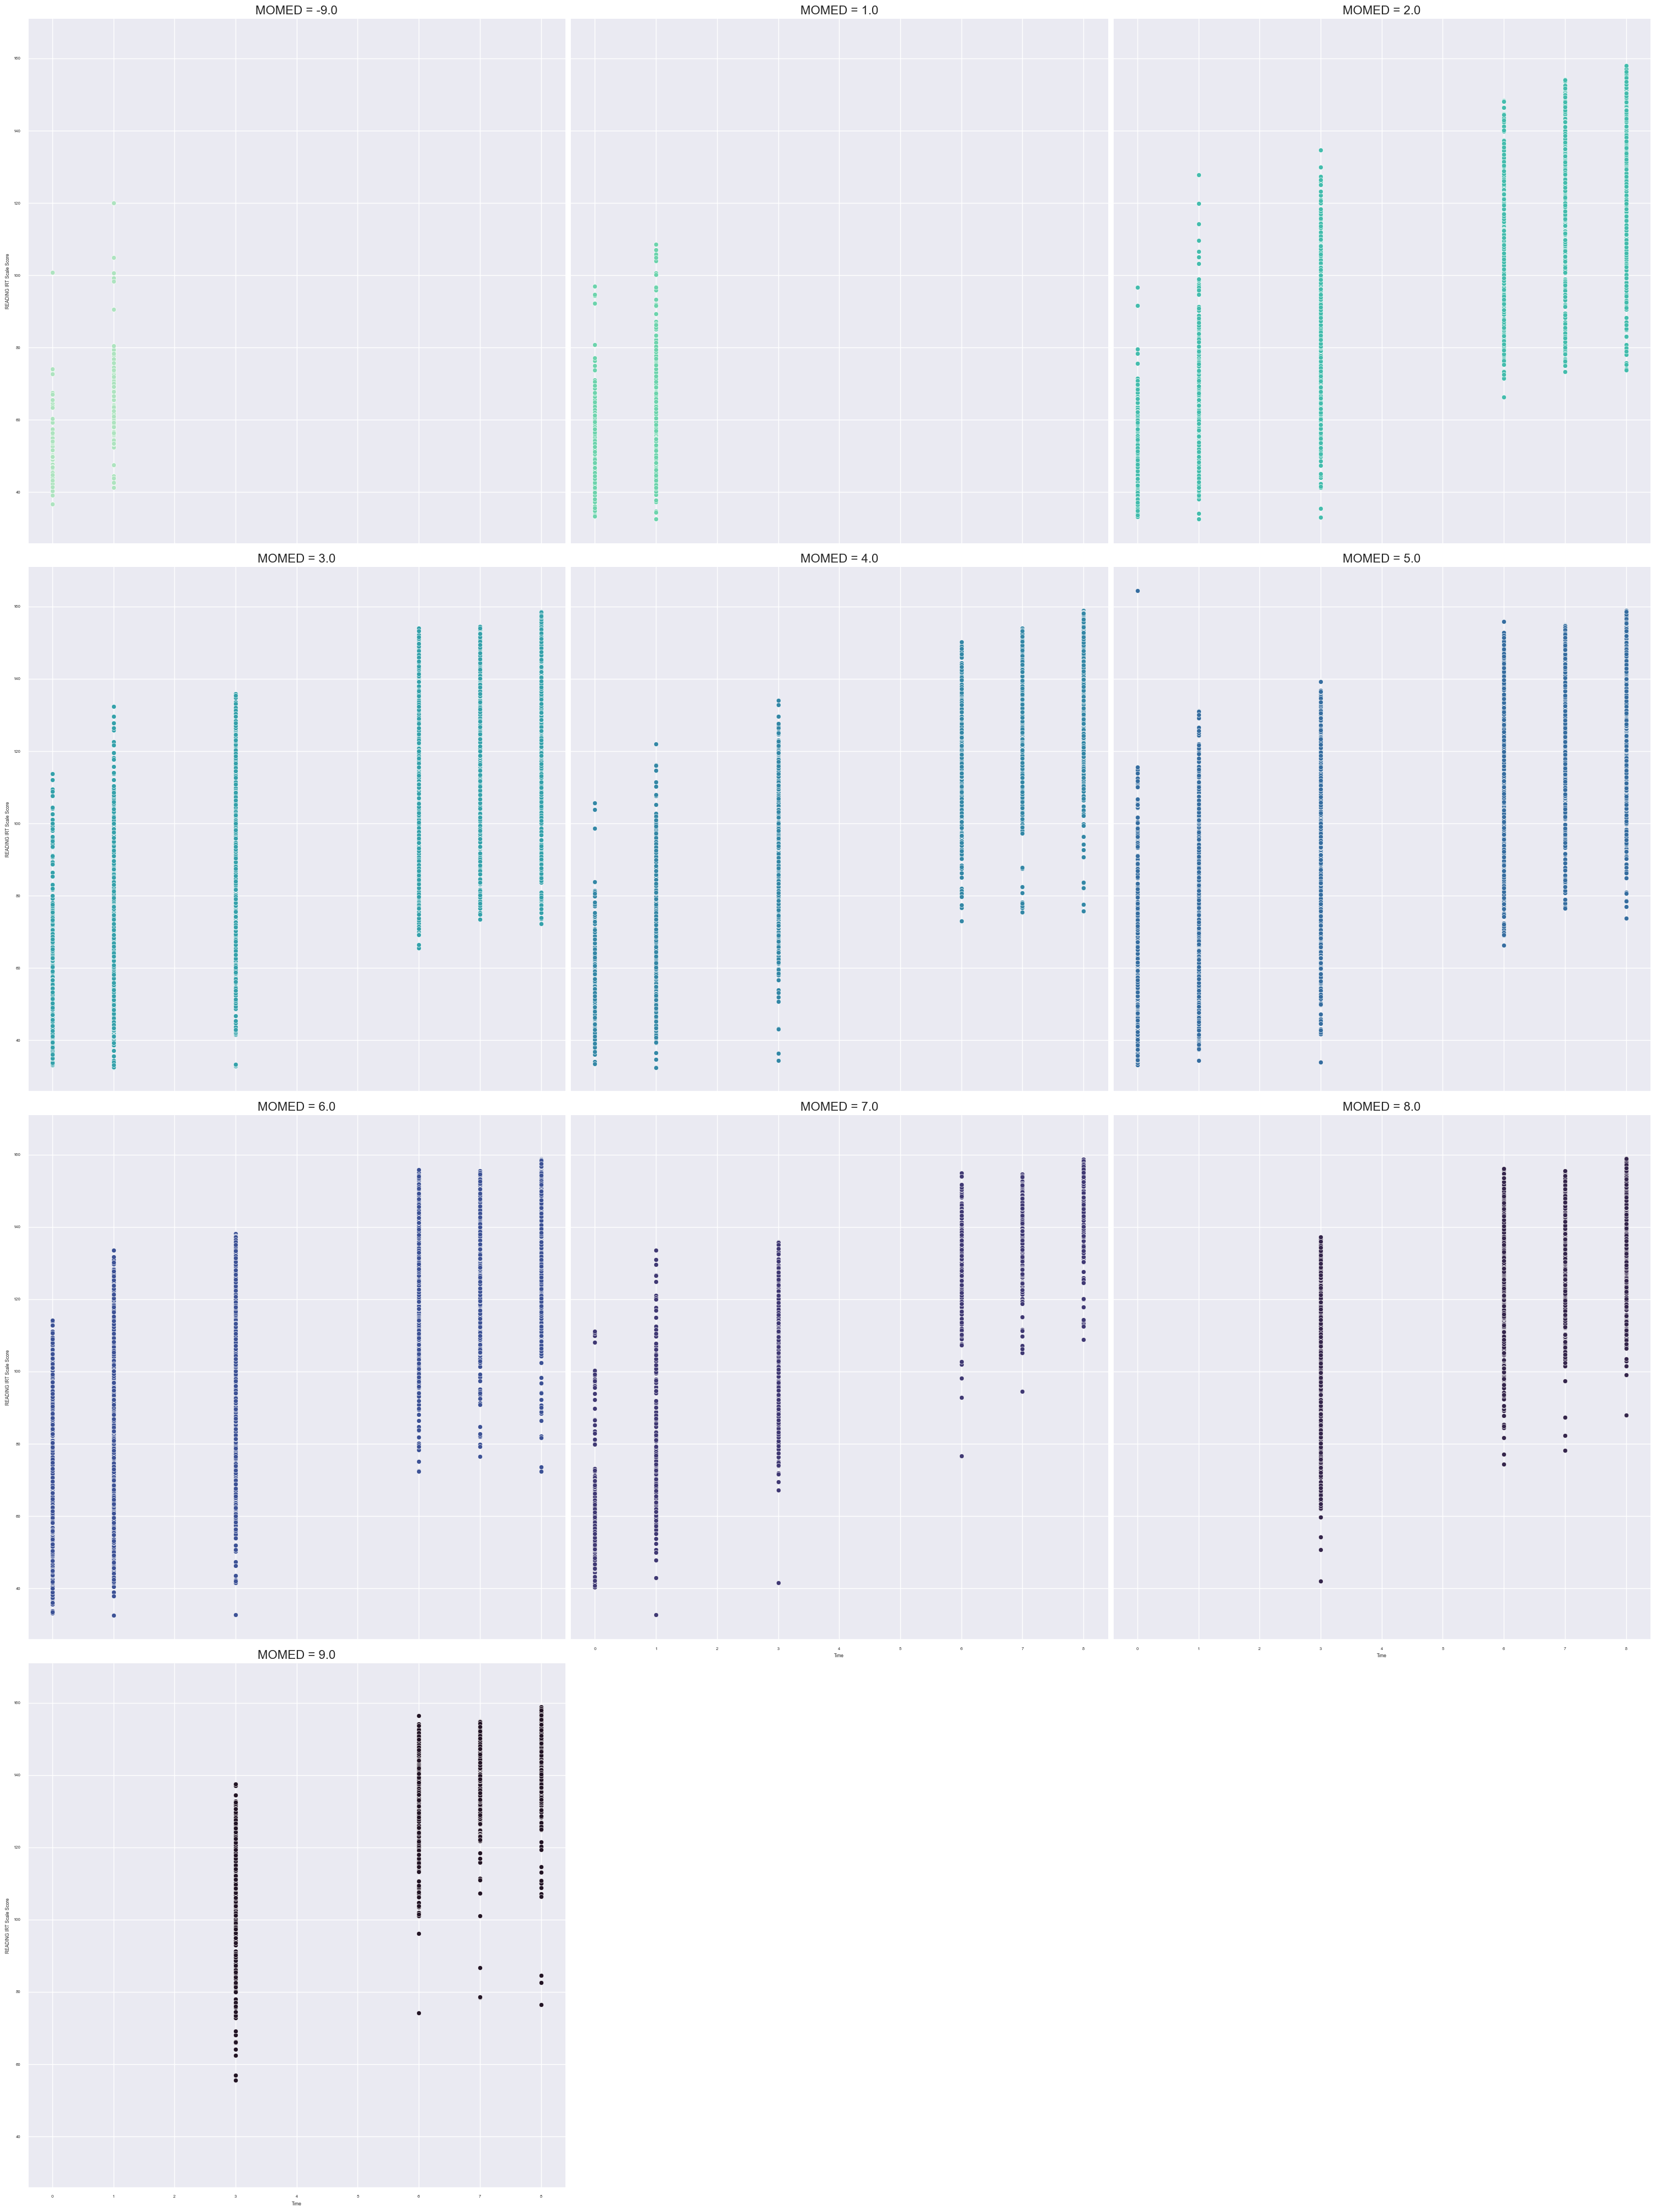

In [24]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(ECLSK2011, col_wrap=3,col="MOMED", hue="MOMED", palette=custom_palette, height=10)

g.map(sns.scatterplot, "TIME", "READING")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=16)
g.set_xlabels("Time")
g.set_ylabels("READING IRT Scale Score")

plt.show()

<Figure size 1000x600 with 0 Axes>

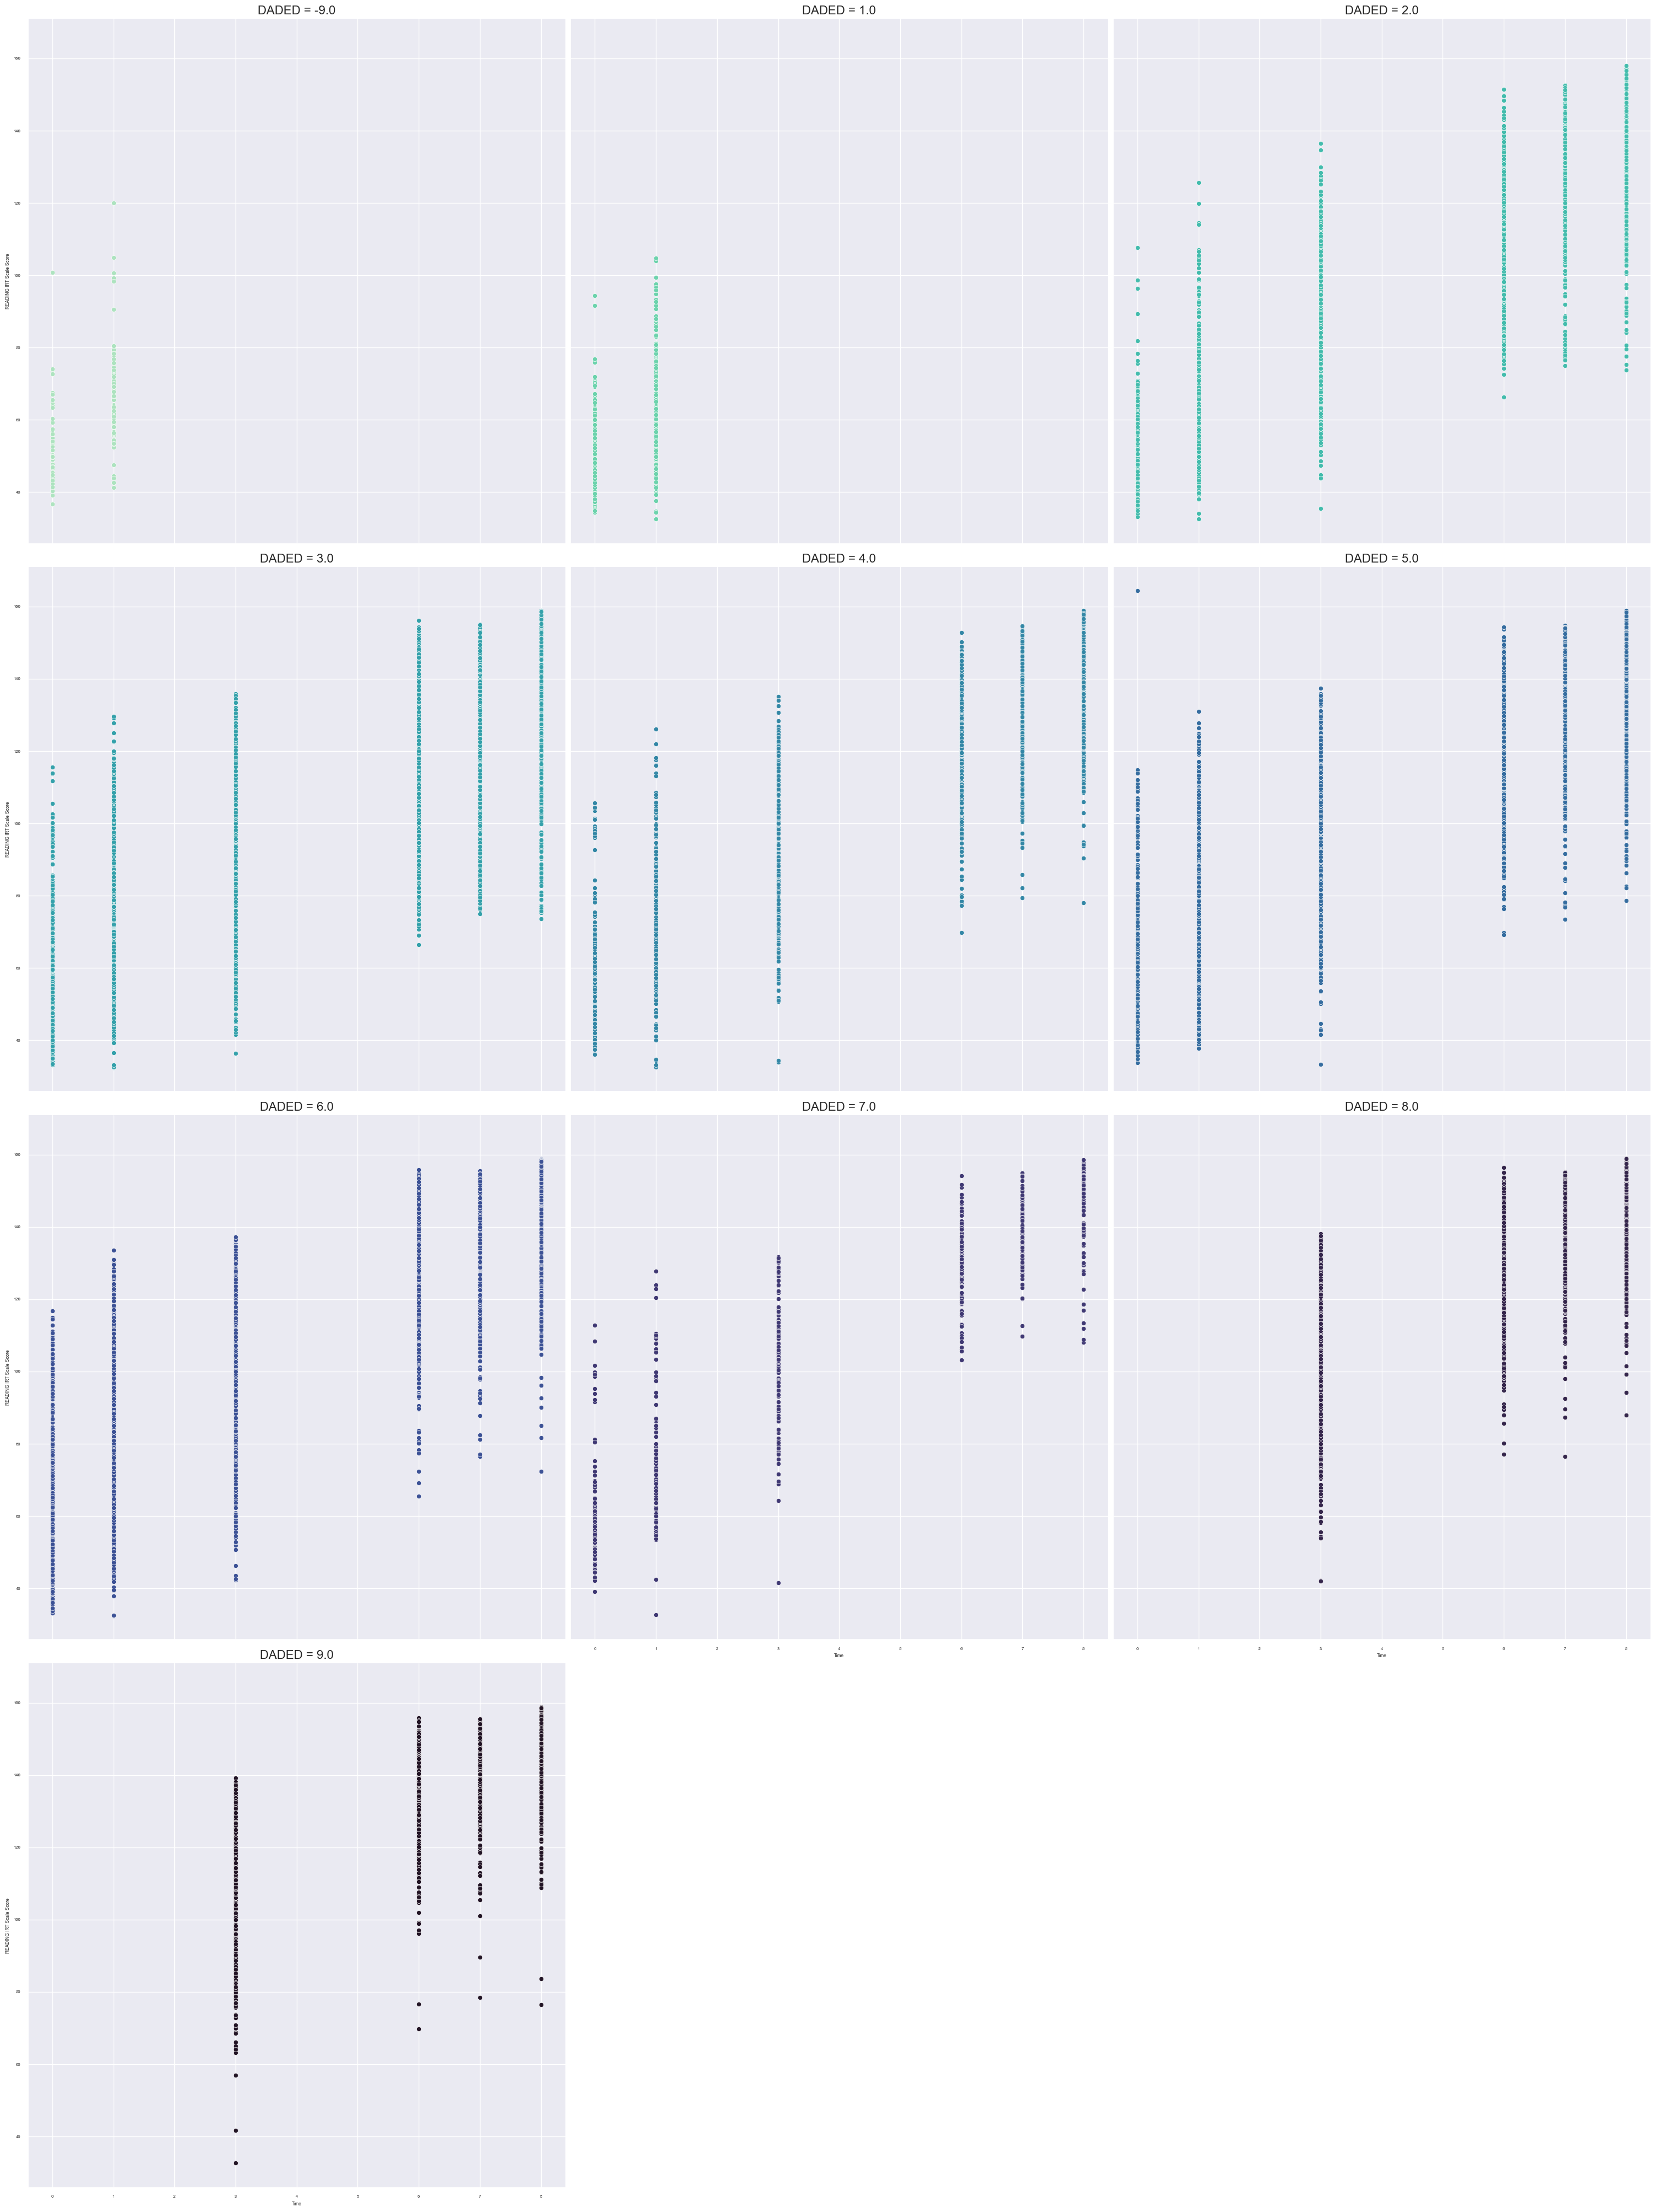

In [25]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(ECLSK2011, col_wrap=3,col="DADED", hue="DADED", palette=custom_palette, height=10)

g.map(sns.scatterplot, "TIME", "READING")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=16)
g.set_xlabels("Time")
g.set_ylabels("READING IRT Scale Score")

plt.show()

In [26]:
daded_order = sorted(ECLSK2011['DADED'].dropna().unique())

plt.figure(figsize=(15, 10))


grid = sns.FacetGrid(data=ECLSK2011, col='DADED', col_wrap=3, height=4, col_order=daded_order, palette=custom_palette)

def plot_lines(x, y,units, data=None, **kwargs):
    sns.lineplot(x=x, y=y, units = units, data=data, estimator = None, palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'READING', 'CHILDID')


for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['DADED'] == title]
    plot_lines('TIME', 'READING', 'CHILDID', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Dad Education Level: {title}')

grid.set_axis_labels('Time', 'Reading Score')

plt.tight_layout()

plt.show()

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

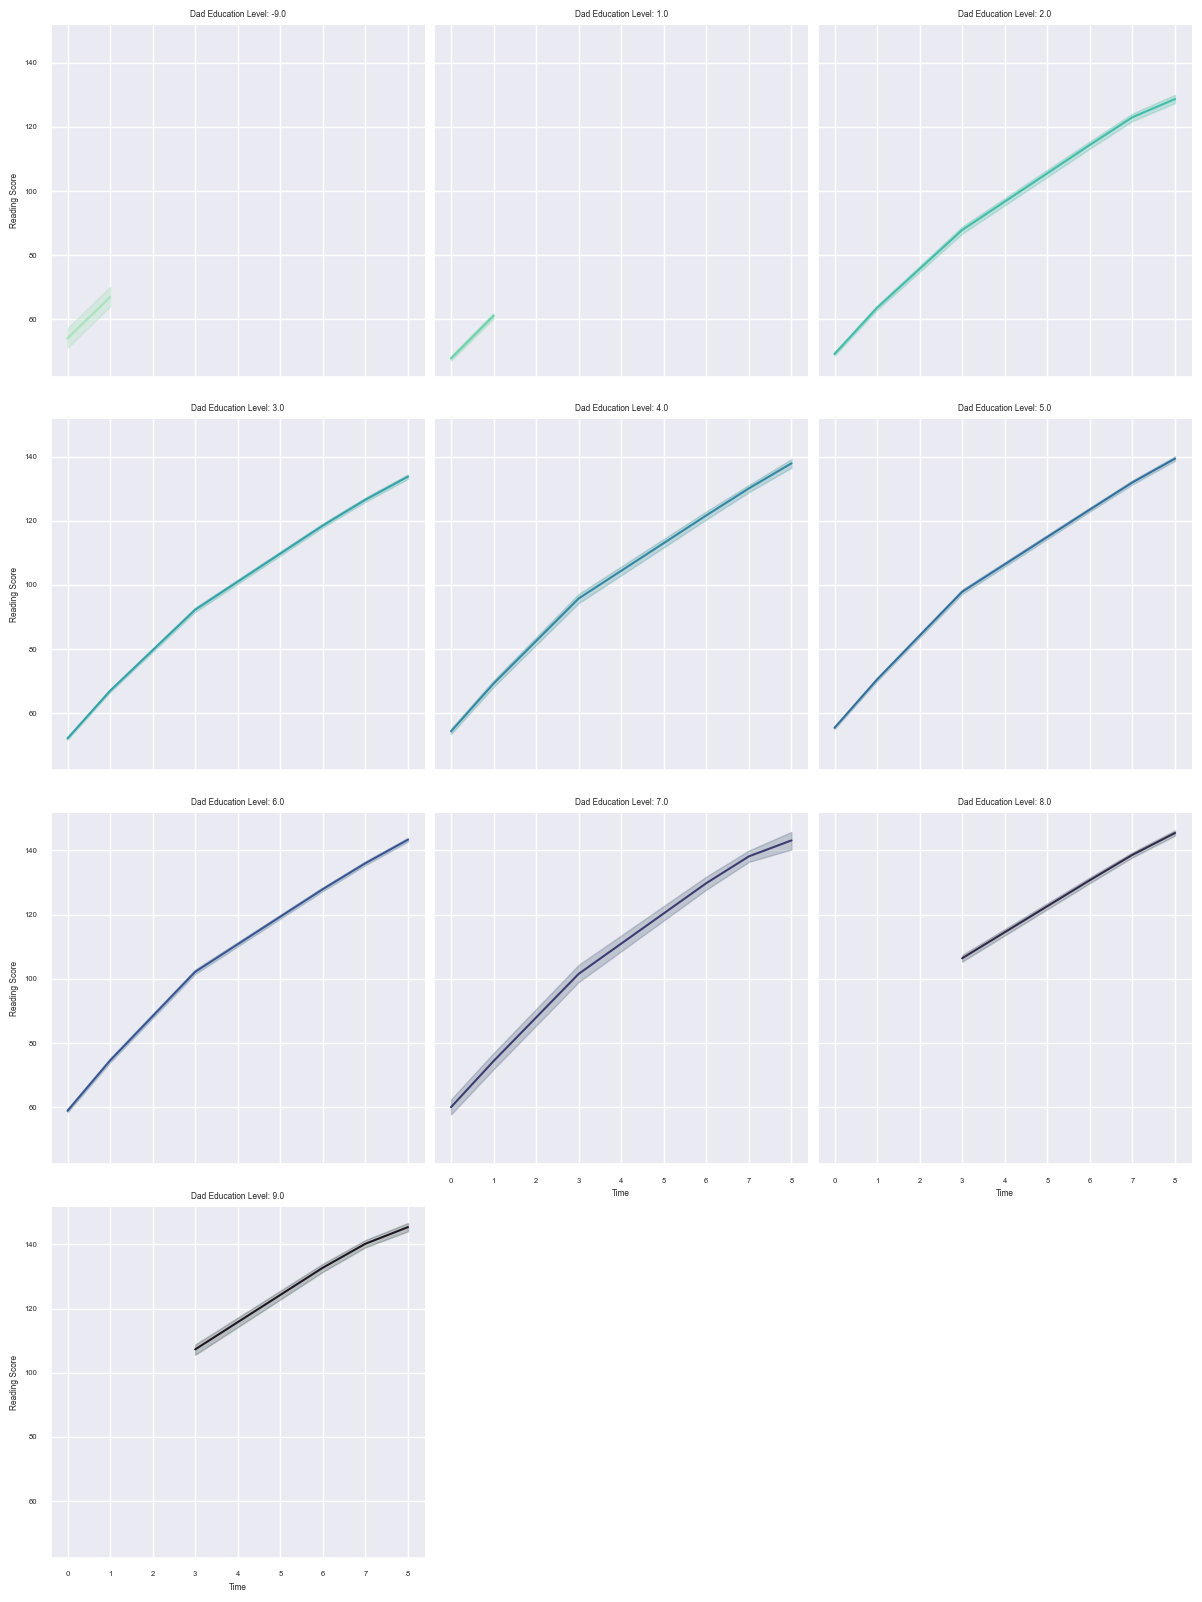

In [27]:
plt.figure(figsize=(15, 10))

grid = sns.FacetGrid(data=ECLSK2011, col='DADED', col_wrap=3, height=4, col_order=daded_order, palette=custom_palette)

def plot_lines(x, y, data=None, **kwargs):
    sns.lineplot(x=x, y=y, data=data, estimator='mean', palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'READING')

for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['DADED'] == title]
    plot_lines('TIME', 'READING', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Dad Education Level: {title}')

grid.set_axis_labels('Time', 'Reading Score')

plt.tight_layout()

plt.show()

In [28]:
momed_order = sorted(ECLSK2011['MOMED'].dropna().unique())

plt.figure(figsize=(15, 10))


grid = sns.FacetGrid(data=ECLSK2011, col='MOMED', col_wrap=3, height=4, col_order=momed_order, palette=custom_palette)

def plot_lines(x, y,units, data=None, **kwargs):
    sns.lineplot(x=x, y=y, units = units, data=data, estimator = None, palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'READING', 'CHILDID')


for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['MOMED'] == title]
    plot_lines('TIME', 'READING', 'CHILDID', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'Mom Education Level: {title}')

grid.set_axis_labels('Time', 'Reading Score')

plt.tight_layout()

plt.show()

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

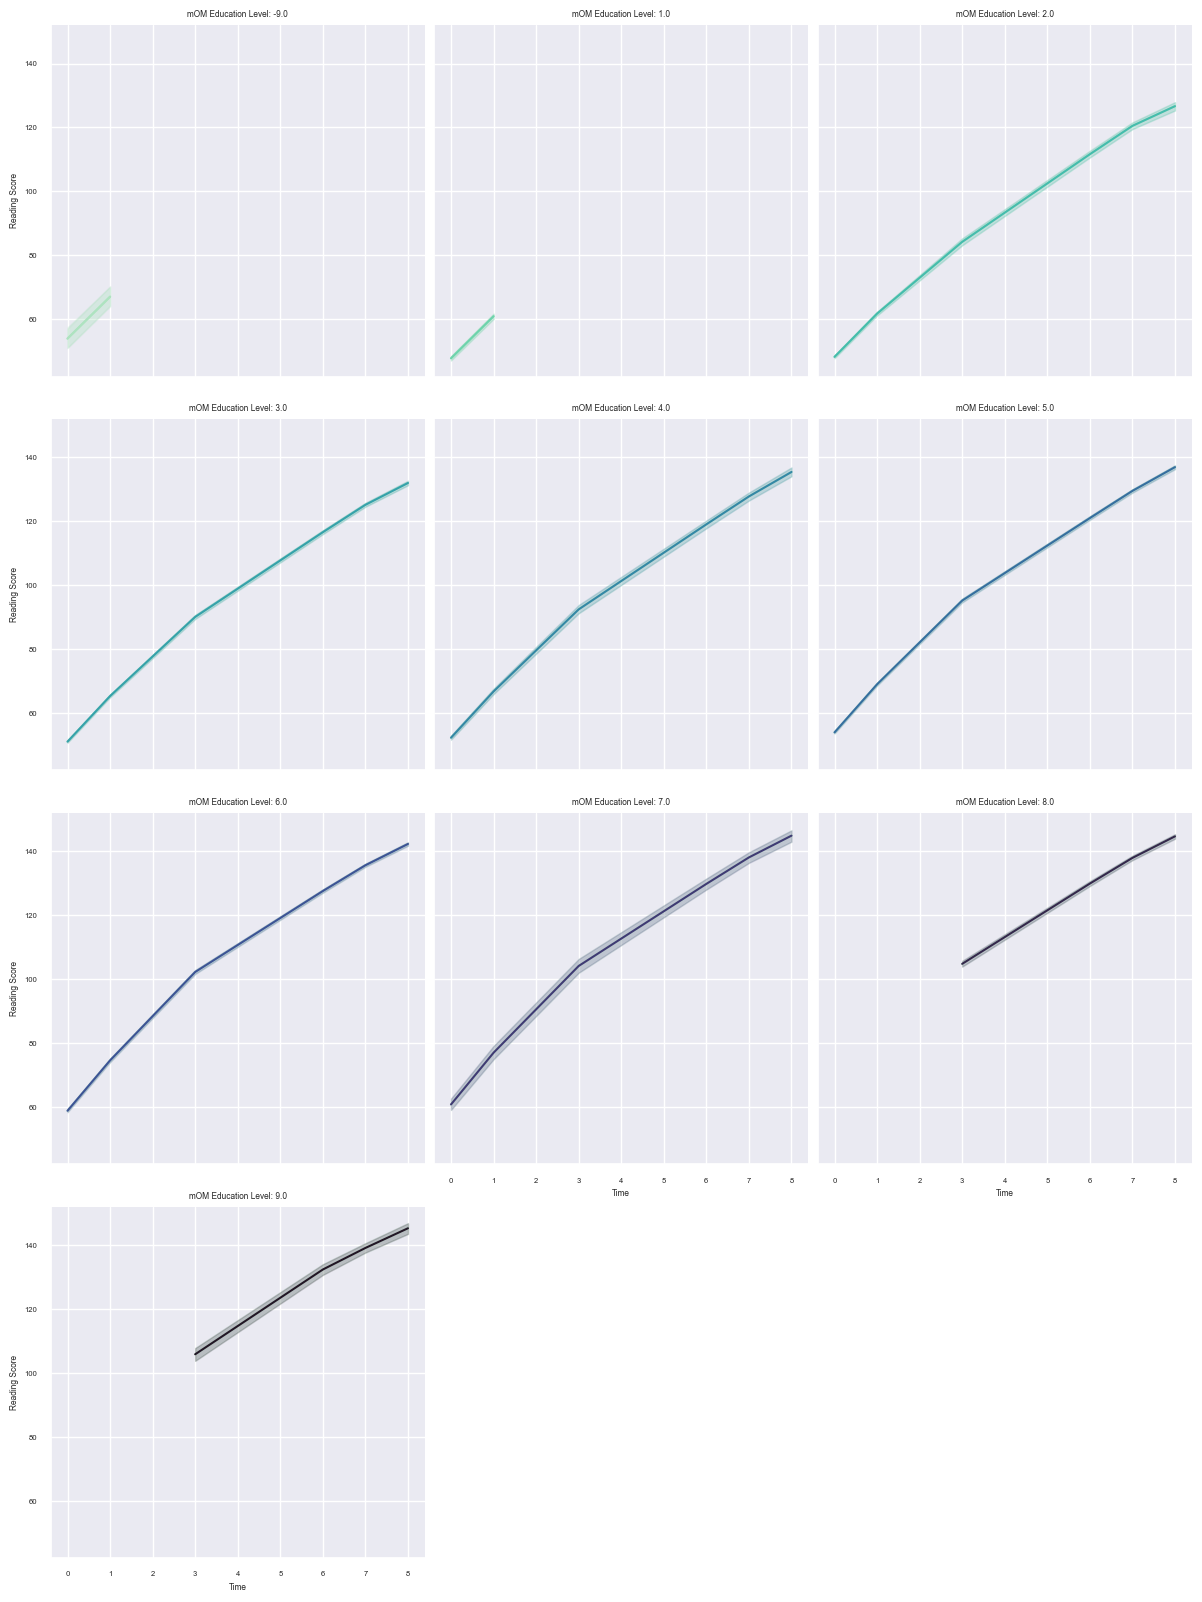

In [29]:
plt.figure(figsize=(15, 10))

grid = sns.FacetGrid(data=ECLSK2011, col='MOMED', col_wrap=3, height=4, col_order=daded_order, palette=custom_palette)

def plot_lines(x, y, data=None, **kwargs):
    sns.lineplot(x=x, y=y, data=data, estimator='mean', palette=[kwargs['color']], **kwargs)

grid.map(plot_lines, 'TIME', 'READING')

for i, (ax, title) in enumerate(zip(grid.axes.flatten(), daded_order)):
    color = custom_palette[i % len(custom_palette)]
    filtered_data = ECLSK2011[ECLSK2011['MOMED'] == title]
    plot_lines('TIME', 'READING', data=filtered_data, ax=ax, color=color)

for ax, title in zip(grid.axes.flatten(), daded_order):
    ax.set_title(f'mOM Education Level: {title}')

grid.set_axis_labels('Time', 'Reading Score')

plt.tight_layout()

plt.show()